[从布朗运动到维纳过程](https://zhuanlan.zhihu.com/p/157543046)

布朗运动 = 随机过程

随机过程 + 未来与历史无关 = 马尔科夫过程

马尔科夫过程 + 单位时间变化的期望服从标准正态分布 = 维纳过程

维纳过程 + 趋势项 = 广义维纳过程

# From Brownian Motion to Wiener Process

# Brownian Motion

**Random Walk** is a stochastic process in a *discrete* space; and **Brownian Motion**, is a stochastic process in a *continuous* space. Suppose our space is integer space, we can use the following code to generate a Brownian motion:

In [6]:
import numpy as np

def Brownian_motion_generator(initial_condition:int, step:int, boundary:int):  
    assert step>0, "step should be positive"
    assert boundary>0, "boundary should be positive"
    assert isinstance(initial_condition, int), "initial_condition should be an integer"
    random_int_list = [initial_condition]
    for _ in range(step-1):
        random_int_list.append(random_int_list[-1] + np.random.randint((-1)*boundary, boundary+1))
    return random_int_list

we can have a direct impression of Brownian motion by ploting the 2D scatters:

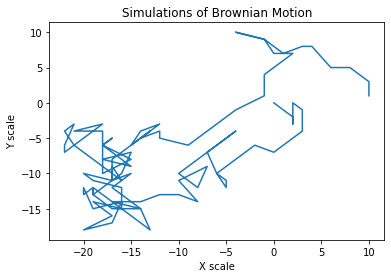

In [10]:
import matplotlib.pyplot as plt

X = Brownian_motion_generator(0, 100, 3)
Y = Brownian_motion_generator(0, 100, 3)
plt.plot(X,Y)
plt.title('Simulations of Brownian Motion')
plt.xlabel('X scale')
plt.ylabel('Y scale')
plt.show()

# Markov Process

A **Markov process** is a random process in which the future is independent of the past, given the present. Thus, Markov processes are the natural stochastic analogs of the deterministic processes described by differential and difference equations. 

Markov process is a special form of Brownian motion (random processes). It states that the future observation only depends on the current observation, but has nothing to do with the historical observations, i.e., in mathematical form:

$$
dX_t = X_t - X_{t-1} = f(X_{t-1}) \space\space [\textbf{has nothing to do with} X_{t-2}, X_{t-3}, ...]
$$

# Wiener Process

**Wiener process** is a real valued continuous-time stochastic process named in honor of American mathematician Norbert Wiener for his investigations on the mathematical properties of the one-dimensional Brownian motion. It is often also called Brownian motion due to its historical connection with the physical process of the same name originally observed by Scottish botanist Robert Brown.

But strictly speaking, 

* Brownian motion = random process (in continuous space)

* Brownian motion + history independent = Markov Process

* Markov process + $\Delta X_t$ ~ $N(0, \Delta t)$ = Wiener Process

$$
\Delta z = \epsilon \sqrt{\Delta t}, \text{ with } \epsilon \sim N(0, 1)
$$

* Wiener process + drift term = (Generalized) Wiener Process

$$
\Delta z = \mu \Delta t + \sigma\epsilon \sqrt{\Delta t}, \text{ with } \epsilon \sim N(0, 1)
$$

There are two properties a Wiener process must meet:
    
1. <span style="color:blue">**normal distribution of increments**</span>: for all $\Delta t$, the increment $\Delta z$ follows a normal distribution with mean=0, and std=$\Delta t$

2. <span style="color:blue">**independence of increments**</span>: for ${\forall} \Delta t_1 \neq \Delta t_2$, $\Delta z_1$ is independent of $\Delta z_2$ 